# Whatsapp Group Chat Data Analysis

**Purpose of project**
* Find most active users in the group
* Find time when most users are active

**Scope**
* Sentiment Analysis on individual member
* Sentiment Analysis on Over-all group chat 

**Assumptions**
* Group has more than 10 active members
* You know how to export whatsapp group chat and enter file path when prompted in code

**How To Use this Notebook**
* Steps to follow:
    * Export Whatsapp group chat as txt
    * Make a copy of this notebook
    * You will be prompted to enter file path in *1.2. Load Whatsapp Group Chat Data*
    * Enter the path of your chat export

**This workbook is interactive. 
You will be prompted to give input file path of your Whatsapp chat export**

## 1. Data Sourcing

### 1.1. Import Libraries

In [1]:
# Import libraries to be used
import pandas as pd
import numpy as np
import re
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

### 1.2. Load Whatsapp Group Chat Data

In [4]:
filepath = input("C:\\Users\\Sakayo\\Desktop\\AIMS\\ChatAnalysis\\WhatsAppChat.txt \n")
df = pd.read_csv(filepath, sep = "delimiter",skip_blank_lines = True, header = None)



C:\Users\Sakayo\Desktop\AIMS\ChatAnalysis\WhatsAppChat.txt 
WhatsAppChat.txt


C:\Users\Sakayo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


## 2. Data Preperation

In [ ]:
# extract date values and return as list of string
def getdate(x):
    res = re.search("\d\d/\d\d/\d\d",x)
    if res != None:
        return res.group()
    else:
        return ""
#datepattern = re.compile("../../..")
df["Date"] = list(map(lambda x : getdate(x), df.iloc[:,0]))


## Merge multiline chat data
## Need to optimize this block
for i in range(0,len(df)):
    if df["Date"][i] == "":
        c=i-1
        for j in range(i,len(df)):
            if df["Date"][j] == "":
                df.iloc[c,0] = " ".join([df.iloc[c,0],df.iloc[j,0]])
                    
            else:
                i=j-1
                break
    else:
        df.iloc[i,0] = df.iloc[i,0]
        
        
## Remove rows where date is empty
df.drop(np.where(df.iloc[:,1]=="")[0],inplace =True)
## Reindex the dataframe
df.index = range(0,len(df))


##Remove date from original text data using substitute function of regular expression
df.iloc[:,0] = list(map(lambda x : re.sub("../../..","", x)[2:],df.iloc[:,0]))



## Extract Day Month and Year from Date 
df["Day"] = list(map(lambda d : d.split("/")[0], df.Date))
df["Months"] = list(map(lambda d : d.split("/")[1], df.Date))
df["Year"] = list(map(lambda d : d.split("/")[2], df.Date))




In [ ]:
df.head(3)

## 3. Data Exploration

In [4]:
df.head()

NameError: name 'df' is not defined

In [5]:
## Preparing data for visualisation

## Find unique members in group
group_members = list(set(df["sender"]))

## Find count of messages shared by each member
n_message = list(map(lambda x : len(np.where(df["sender"]==x)[0]),group_members)) 

## Create a dataframe to store above values
activity_data = pd.DataFrame({"sender": group_members,"n_count":n_message})
## Sort data for convenience and rearrange index
activity_data = activity_data.sort_values(by=["n_count"], ascending=False)
activity_data.index = range(0,len(activity_data))

## creating groups of data by time meridian
timemeridian = df.groupby(by = "AmPm")

amhours = timemeridian.get_group("am")
pmhours = timemeridian.get_group("pm")

## getting hourly activity counts
amhourcounts = amhours.Hour.value_counts().sort_index()
pmhourcounts = pmhours.Hour.value_counts().sort_index()

NameError: name 'df' is not defined

### 3.1 Top Active Members

In [6]:
## Most active members in group

X = activity_data["sender"][:10]
Y = activity_data.n_count[:10]

plt.figure(figsize=[10,10])

plt.title("Top 10 Active Members", size = 16)

plt.bar(x = X, height= Y, color = "seagreen")
plt.xticks(rotation = 90, size = 12)
plt.yticks(size = 12)

for i in range(0,10):
    plt.annotate(s = Y[i], xy = (i-0.25,Y[i]+5), size = 12)

plt.show()


NameError: name 'activity_data' is not defined

### 3.2 Activity Throughout Day

NameError: name 'amhourcounts' is not defined

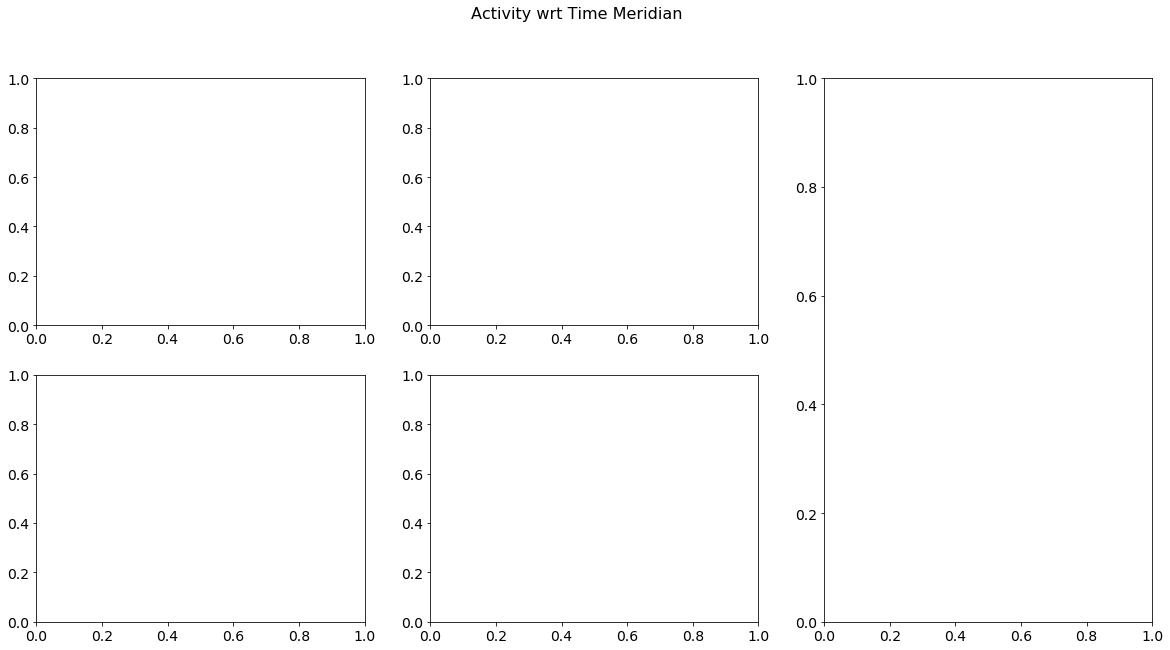

In [7]:
fig = plt.figure(figsize=[20,10])
mpl.rcParams['font.size'] = 14.0

fig.suptitle("Activity wrt Time Meridian", size = 16)

gs = GridSpec(2,3) # 2 rows and 3 columns
ax1 = fig.add_subplot(gs[0,0]) # first row, first col
ax2 = fig.add_subplot(gs[0,1]) # first row, second col
ax3 = fig.add_subplot(gs[1,0]) # second row, first col
ax4 = fig.add_subplot(gs[1,1]) # second row, second col
ax5 = fig.add_subplot(gs[:,2]) # all row, third col

# Pie plot for messages shared in AM time meridian
ax1.pie(amhourcounts.values, labels = amhourcounts.index)
ax1.set_title("AM")
# Bar plot for messages shared in AM time meridian
ax2.bar(amhourcounts.index,amhourcounts.values)

# Pie plot for messages shared in PM time meridian
ax3.pie(pmhourcounts.values, labels = pmhourcounts.index)
ax3.set_title("PM")
# Bar plot for messages shared in PM time meridian
ax4.bar(pmhourcounts.index,pmhourcounts.values)

# Bar plot showing AM vs PM
ax5.bar(["AM","PM"], [len(amhours),len(pmhours)])
ax5.annotate(s = str(round(100*len(amhours)/(len(amhours)+len(pmhours)))) + "%", xy = [0,len(amhours)/2], color = "white", size = 14, horizontalalignment = "center")
ax5.annotate(s = str(round(100*len(pmhours)/(len(amhours)+len(pmhours)))) + "%", xy = [1,len(pmhours)/2], color = "white", size = 14, horizontalalignment = "center")


plt.show()